In [1]:
from sklearn import datasets
from sklearn import ensemble, cross_validation, learning_curve, tree 

import numpy as np

C:\Users\User\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\User\Anaconda2\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [2]:
digits = datasets.load_digits()
X = digits.data
y = digits.target


In [3]:
tree_classifier = tree.DecisionTreeClassifier()
tree_cross_val_score_mean = cross_validation.cross_val_score(tree_classifier, X, y, cv = 10).mean()
print tree_cross_val_score_mean

0.826318897757


In [19]:
def write_answer_to_file(answers, filename):
    with open(filename, "w") as fout:
        fout.write(" ".join([str(num) for num in answers]))
        
def write_answer(answer, filename):
    with open(filename, "w") as fout:
        fout.write(str(answer))

In [5]:
write_answer(tree_cross_val_score_mean, "ans1.txt")

In [6]:
bagging_classifier = ensemble.BaggingClassifier(tree_classifier, n_estimators = 100)
bagging_classifier.fit(X,y)
bagging_tree_cross_val_score_mean = cross_validation.cross_val_score(bagging_classifier, X, y, cv = 10).mean()
print bagging_tree_cross_val_score_mean

0.929341902881


In [7]:
write_answer(bagging_tree_cross_val_score_mean, "ans2.txt")

In [8]:
bagging_classifier = ensemble.BaggingClassifier(tree_classifier, n_estimators = 100, max_features = 8)
bagging_classifier.fit(X,y)
bagging_tree_cross_val_score_mean = cross_validation.cross_val_score(bagging_classifier, X, y, cv = 10).mean()
print bagging_tree_cross_val_score_mean

0.929832636141


In [9]:
write_answer(bagging_tree_cross_val_score_mean, "ans3.txt")

In [10]:
tree_classifier = tree.DecisionTreeClassifier(max_features = 8)
bagging_classifier = ensemble.BaggingClassifier(tree_classifier, n_estimators = 100)
bagging_classifier.fit(X,y)
bagging_tree_cross_val_score_mean = cross_validation.cross_val_score(bagging_classifier, X, y, cv = 10).mean()
print bagging_tree_cross_val_score_mean

0.952690759362


In [11]:
write_answer(bagging_tree_cross_val_score_mean, "ans4.txt")

In [12]:
import matplotlib
from matplotlib import pyplot 
matplotlib.style.use('ggplot')
%matplotlib inline

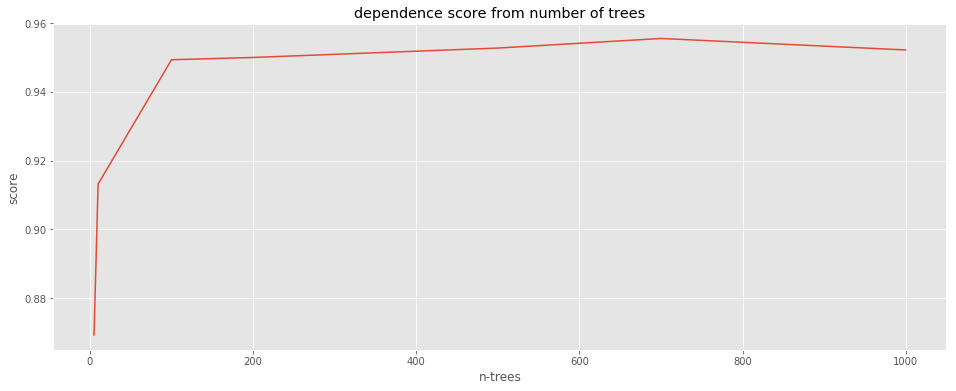

In [14]:
def plot_random_forest_trees():
    trees = [5, 10, 100, 200, 500, 700, 1000]
    cross_val_scores = []
    for tree in trees:
        random_forest_classifier = ensemble.RandomForestClassifier(n_estimators=tree)
        cross_val_scores.append(cross_validation.cross_val_score(random_forest_classifier, X, y, cv = 10).mean())
    pyplot.figure(figsize = (16, 6))
    pyplot.plot(trees, cross_val_scores)
    pyplot.xlabel("n-trees")
    pyplot.ylabel("score")
    pyplot.title("dependence score from number of trees")
    pyplot.show()
plot_random_forest_trees()

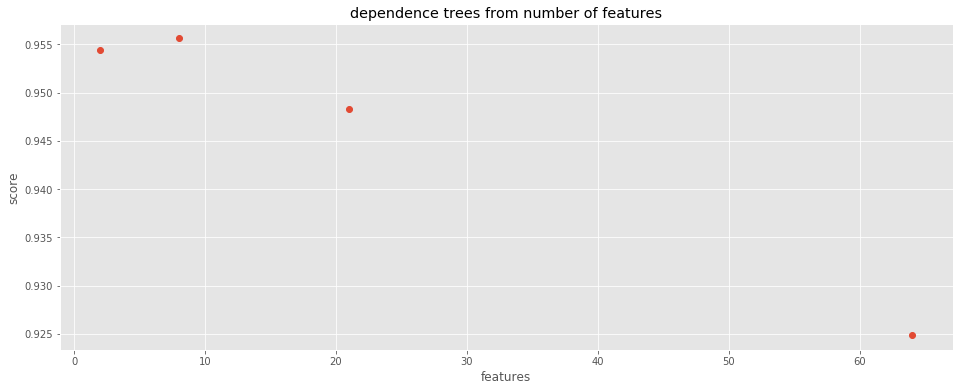

In [22]:
def plot_random_forest_trees_max_features():
    d = X.shape[1]
    features = [2, int(np.sqrt(d)), int(d/3), d]
    scores = []
    for feature in features:
        random_forest_classifier = ensemble.RandomForestClassifier(n_estimators=400, random_state=101, max_features=feature)
        scores.append(cross_validation.cross_val_score(random_forest_classifier, X, y, cv = 10).mean())
    pyplot.figure(figsize=(16, 6))
    pyplot.plot(features, scores, 'o')
    pyplot.xlabel("features")
    pyplot.ylabel("score")
    pyplot.title("dependence trees from number of features")
    pyplot.show()
plot_random_forest_trees_max_features() 

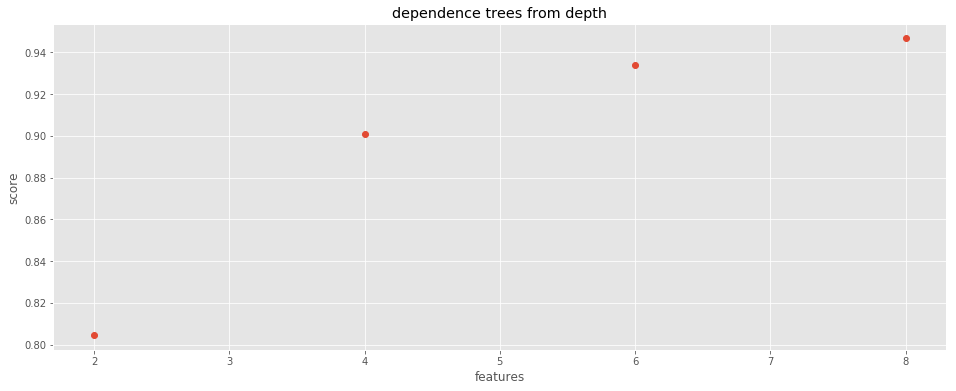

In [25]:
def plot_random_forest_tree_depth():
    #d = X.shape[1]
    depths = [2, 4, 6, 8]
    scores = []
    for depth in depths:
        random_forest_classifier = ensemble.RandomForestClassifier(n_estimators=400, random_state=101, max_depth=depth)
        scores.append(cross_validation.cross_val_score(random_forest_classifier, X, y, cv = 10).mean())
    pyplot.figure(figsize=(16, 6))
    pyplot.plot(depths, scores, 'o')
    pyplot.xlabel("features")
    pyplot.ylabel("score")
    pyplot.title("dependence trees from depth")
    pyplot.show()
plot_random_forest_tree_depth() 

In [20]:
answers = [2, 3, 4, 7]
write_answer_to_file(answers, "ans5.txt")